# Julia绘图

Julia绘图主要使用`Plots`和`Makie`两个包， 使用一段时间后发现`Makie`的绘图功能更有逻辑， 简单易学， 定制性强， LaTeX支持完备, 他的绘图逻辑和`Matplotlib`非常像， `GLMakie`还支持GPU渲染，图形更加精美， 最后， `Makie`的三维绘图功能十分强大

图形构成：
+ Figure: 画布， 一个画布可以包含多个坐标系
+ Axis： 坐标系， 一个坐标系仅能在一个画布中， 坐标系是我们的绘图区域
    - 这里与Matplotlib的Axes很像但是叫法不一样
+ Plots： 绘图元素，点，线，文字，图形等

In [237]:
using CairoMakie
using LaTeXStrings

## 创建绘图

### 依次创建

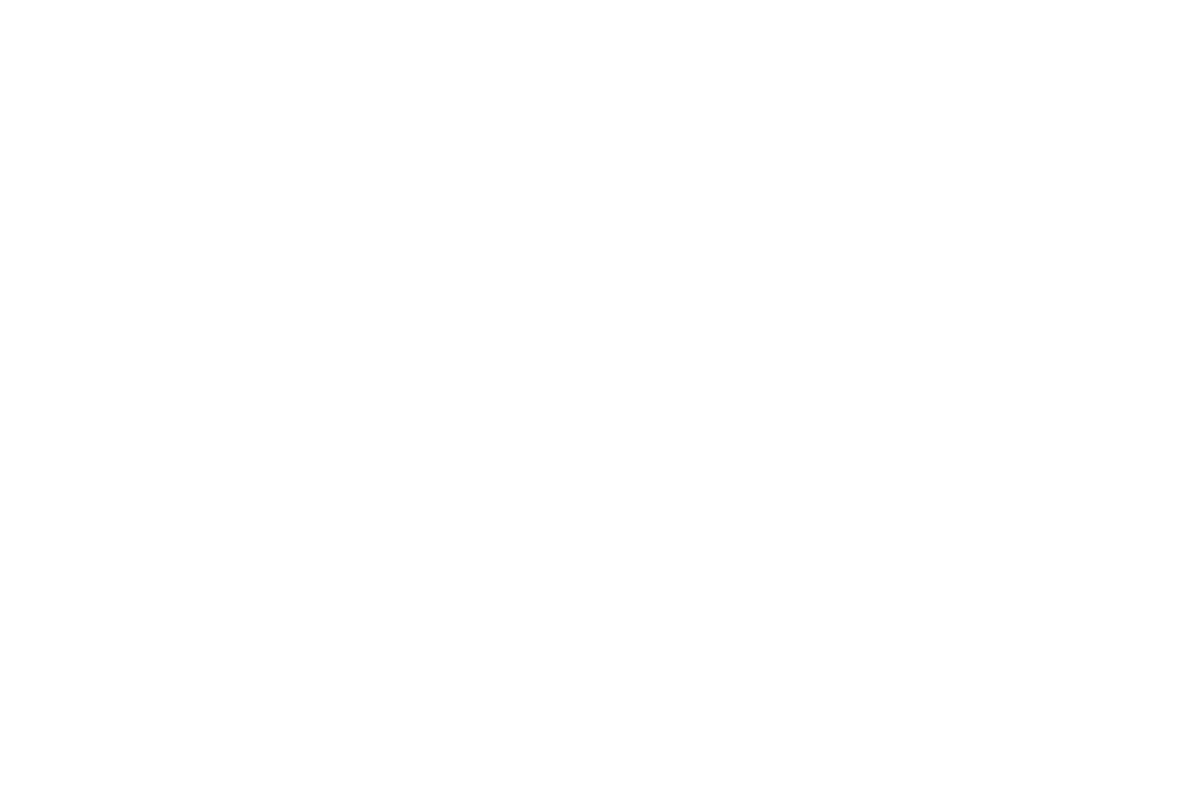

In [238]:
# 创建一个画布， 可以设置分辨率和字号， 由于画布是白的， 我们看不到
f = Figure(resolution = (1200, 800), fontsize = 30)

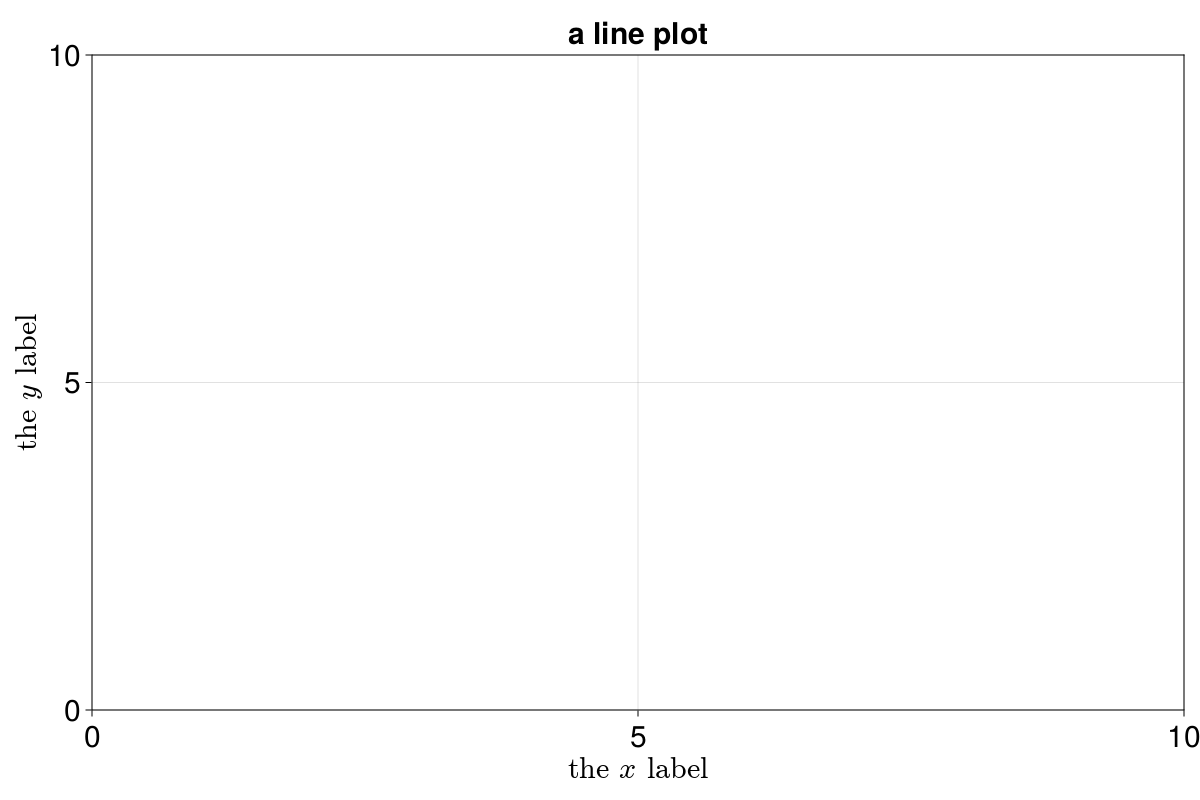

In [239]:
# 在画布中创建一个绘图区域， 这里使用数组下标来表示位置, 这样就可以很方便的创建多个子图
# 在这里可以设置很多东西
ax = Axis(f[1, 1],title = "a line plot", xlabel = L"the $x$ label", ylabel = L"the $y$ label")
f

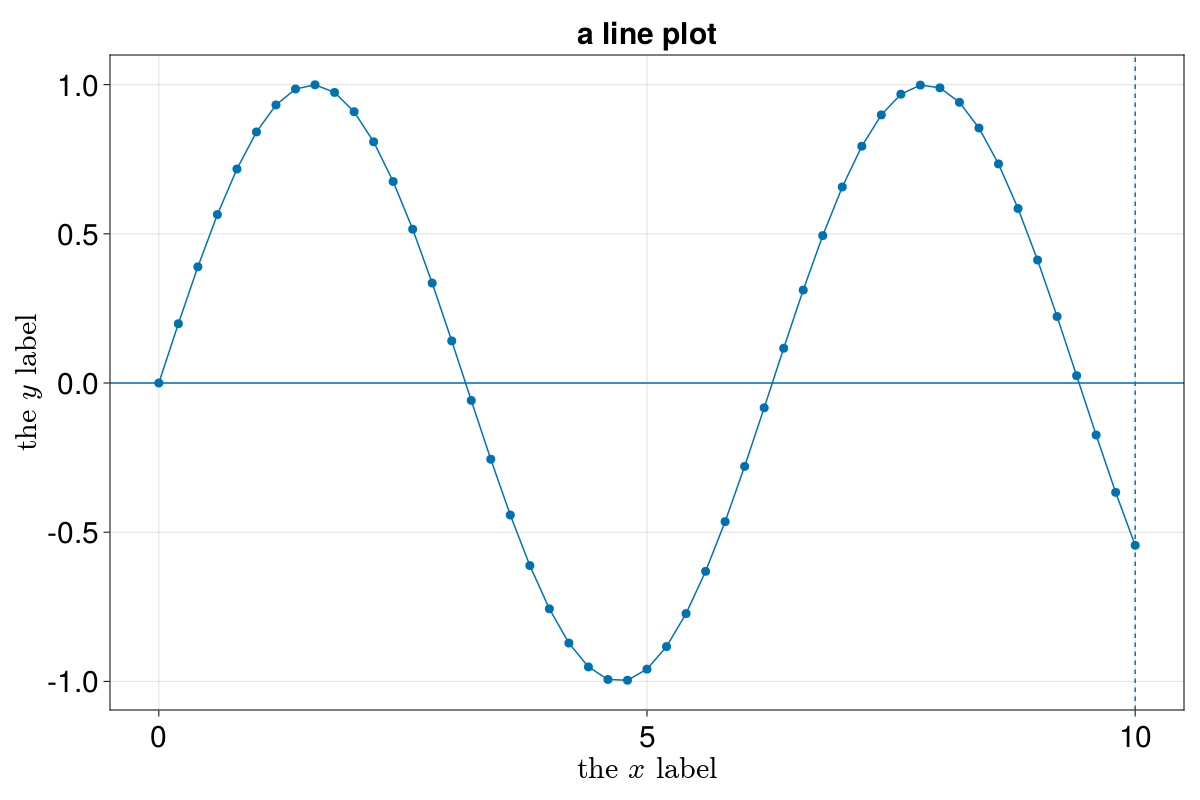

In [240]:
# 画布和绘图区域创建好了， 就可以在其中画图了
x = 0:0.2:10
y = sin.(x)
lines!(f[1, 1], x, y)
scatter!(f[1, 1], x, y) # 在绘图区域画散点， “修改Axes”， 要用带叹号的函数
vlines!(f[1, 1], 10, linestyle = :dash) # 在 x = 10 这一点画一条竖线
hlines!(f[1, 1], 0)  # 在 y = 0 这一点画一条横线
#=一个细节
图层： line是第一个图层， scatter是第二个图层， scatter在line之上， 要是line在scatter至上就能看到线穿过圆圈
=#
f # 显示绘图结果

### 保存图片

In [241]:
#= 一个细节
GLMakie无法存储为pdf貌似， CarioMakie可以
=#

save("./figure/demo1.pdf", f, pt_per_unit = 1)

关于图片的注意事项

学术出版时， 图片一般要求为pdf格式，而且图片中的文字可以选择， 最好图片中的文本字号和你的正文字号一致
那么**导出pdf格式时要加上pt_per_unit = 1**这个选项（必须要加）， 另外导出为pdf时分辨率选项就失去了意义， 因为pdf是矢量图格式， 而且导出的pdf（矢量图）和我们在Jupyter(位图)看到的不一样。

### 一次创建

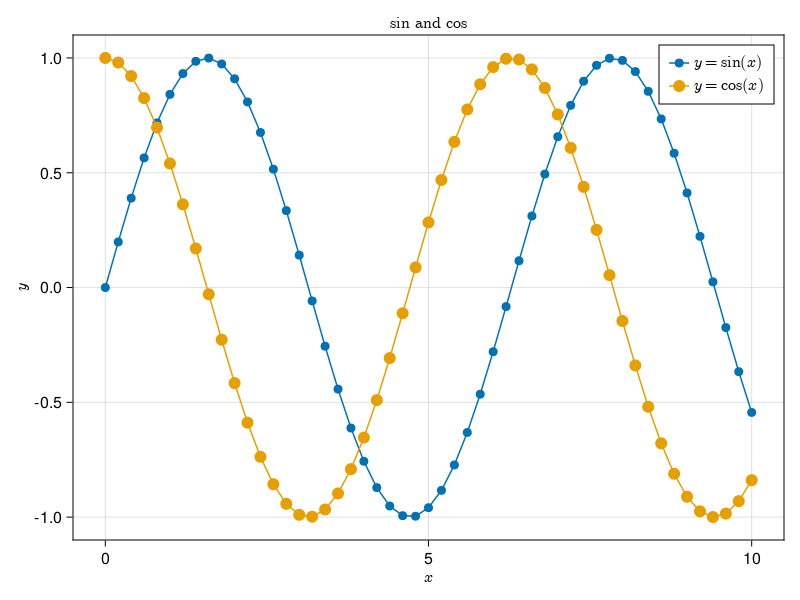

In [242]:
# 画布， 绘图区域， Plots
f, ax, _ = scatterlines(x, y, label = L"$y = \sin(x)$")
scatterlines!(ax, x, cos.(x), label = L"$y = \cos(x)$", markersize = 12)
ax.xlabel = L"$x$"
ax.ylabel = L"$y$"
ax.title = L"$\sin$ and $\cos$"
axislegend(ax; position = :rt)

f

## 子图

In [243]:
f = Figure(;resolution = (800, 600), fontsize = 12)
ax11 = Axis(f[1, 1]; title = L"$y = \sin(x)$", xlabel = L"$x$", ylabel = L"$y$")
ax12 = Axis(f[1, 2]; title = L"$y = \cos(x)$", xlabel = L"$x$", ylabel = L"$y$")
ax212 = Axis(f[2, 1:2]; title = L"$y = \sin(x) \cdot \cos(x)$", xlabel = L"$x$", ylabel = L"$y$")

Axis with 1 plots:
 ┗━ Mesh{Tuple{GeometryBasics.Mesh{3, Float32, GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.FaceView{GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}, StructArrays.StructVector{GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, NamedTuple{(:position, :normals), Tuple{Vector{Point{3, Float32}}, Vector{Vec{3, Float32}}}}, Int64}, Vector{GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}}}}}}


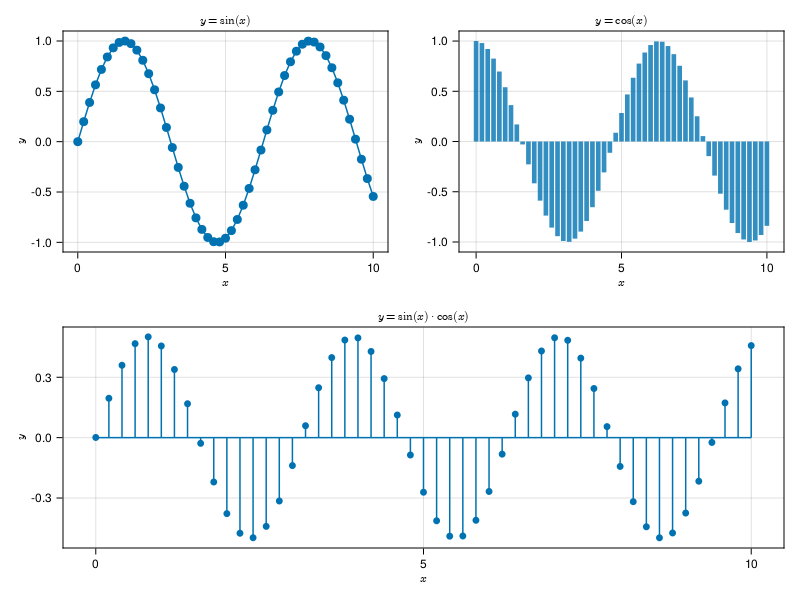

In [244]:
scatterlines!(ax11, x, sin.(x))
barplot!(ax12, x, cos.(x))
stem!(ax212, x, sin.(x) .* cos.(x))
f

In [245]:
save("./figure/demo2.pdf", f,  pt_per_unit = 1)

## 概率分布图

In [246]:
x = randn(1000);

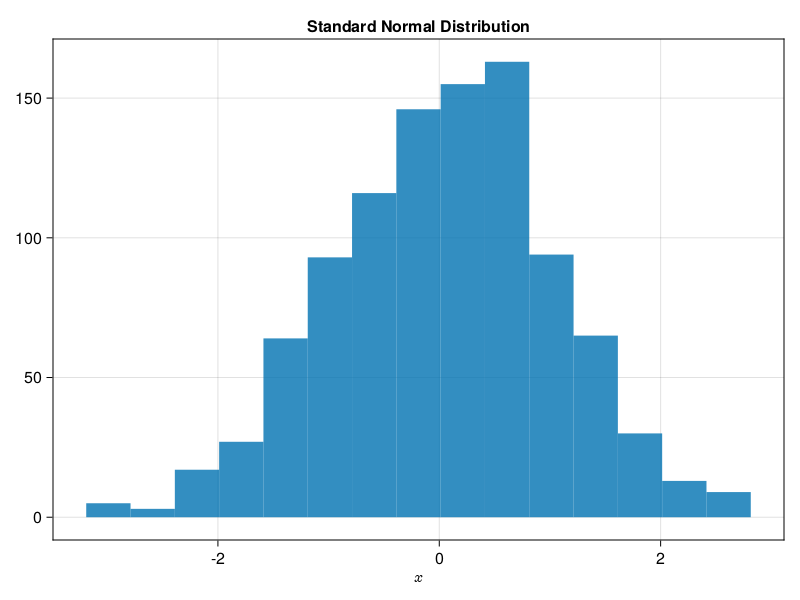

In [247]:
f, ax11, histplot = hist(x; axis = (xlabel = L"$x$", title = "Standard Normal Distribution"))

In [248]:
ax12 = Axis(f[1, 2];title = "Standard Normal Distribution", xlabel = L"$x$")

Axis with 1 plots:
 ┗━ Mesh{Tuple{GeometryBasics.Mesh{3, Float32, GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.FaceView{GeometryBasics.TriangleP{3, Float32, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}}, GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}, StructArrays.StructVector{GeometryBasics.PointMeta{3, Float32, Point{3, Float32}, (:normals,), Tuple{Vec{3, Float32}}}, NamedTuple{(:position, :normals), Tuple{Vector{Point{3, Float32}}, Vector{Vec{3, Float32}}}}, Int64}, Vector{GeometryBasics.NgonFace{3, GeometryBasics.OffsetInteger{-1, UInt32}}}}}}}


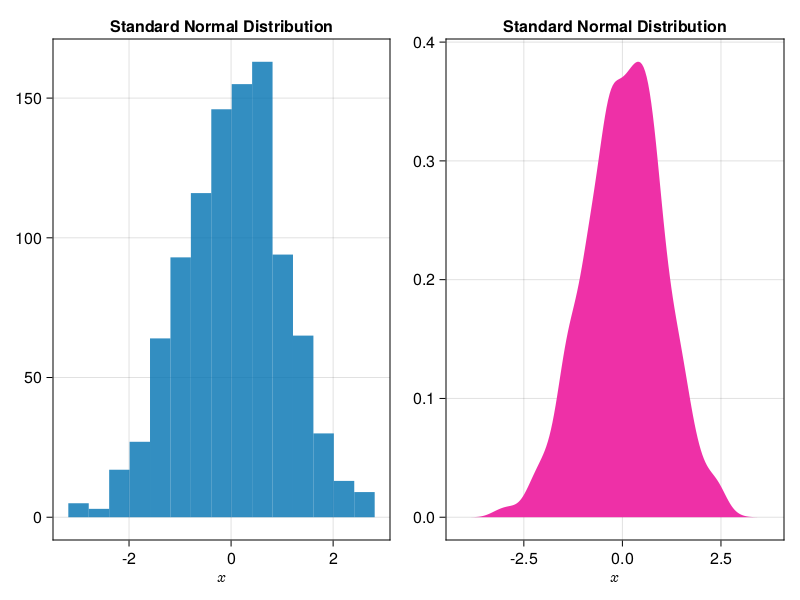

In [249]:
density!(ax12, x, color = :maroon2)
f

In [250]:
ax3d = Axis3(
    f[2, 1:2], 
    title = "3D plot", 
    aspect=(0.5,0.5,1), 
    perspectiveness=0.75, 
    height = 250,
    xlabel = L"$x$",
    ylabel = L"$y$",
    zlabel = L"$z$"
)

Axis3()

In [251]:
xs = ys = LinRange(-0.5, 0.5, 100)
zs = [sqrt(x^2+y^2) for x in xs, y in ys]

contour3d!(ax3d, -zs, levels=-(.025:0.05:.475), linewidth=2, color=:blue2)
contour3d!(ax3d, +zs, levels=  .025:0.05:.475,  linewidth=2, color=:red2)

Combined{Makie.contour3d, Tuple{StepRangeLen{Float32, Float64, Float64, Int64}, StepRangeLen{Float32, Float64, Float64, Int64}, Matrix{Float32}}}

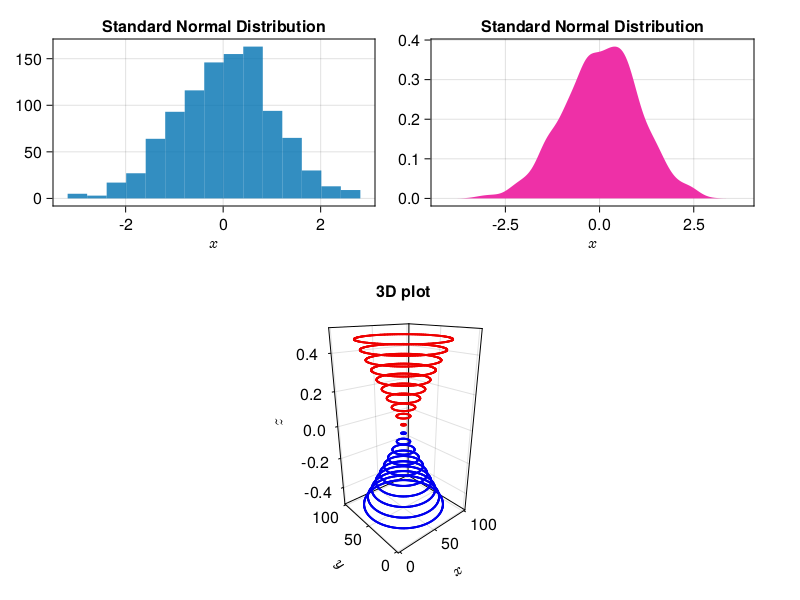

In [252]:
f

In [253]:
save("./figure/demo3.pdf", f, pt_per_unit = 1)